<a href="https://colab.research.google.com/github/miles-garcia/DSPS_MGarcia/blob/main/P661_HW6_MGarcia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels.datasets import elnino

!pip install george
import george
from george import kernels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 11.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for george: filename=george-0.4.0-cp310-cp310-linux_x86_64.whl size=355559 sha256=a219c88ce47f2567167deb688e9eb014cd2c0c2e18a7b94a2345aca34a6283ca
  Stored in directory: /root/.cache/pip/wheels/63/02/e3/24f2361717de09616769d97ed5854b4703d4df49fb1a3a1131
Successfully built george


In [2]:
import datetime

# NB

Code skeletons are provided for you, but you may change them as you please.

It is not required, but I suggest you adjust and complete the given docstrings as you make changes.

# 0. The Dataset

We'll be using the El Niño dataset from the `statsmodels` package. This first cell of code loads the dataset easily for you. Read the description of the dataset [here](https://www.statsmodels.org/devel/datasets/generated/elnino.html).

In [3]:
def load_elnino_dataset():
    """
    Downloads the El Niño dataset from the statsmodels package.

    Parameters
    ----------
    None

    Returns
    -------
    df : pd.DataFrame
        A Pandas dataframe containing the raw data of the El Niño dataset
        directly from the statsmodels package.
    """
    df = elnino.load_pandas().data
    return df

df = load_elnino_dataset()

In [4]:
df.tail()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
56,2006.0,24.76,26.52,26.22,24.29,23.84,22.82,22.20,21.89,21.93,22.46,22.61,24.15
57,2007.0,25.82,26.81,26.41,24.96,23.05,21.61,21.05,19.95,19.85,19.31,19.82,21.15
58,2008.0,24.24,26.39,26.91,25.68,24.43,23.19,23.02,22.14,21.60,21.39,21.54,22.73
59,2009.0,24.39,25.53,25.48,25.84,24.95,24.09,23.09,22.03,21.48,21.64,21.99,23.21
60,2010.0,24.70,26.16,26.54,26.04,24.75,23.26,21.11,19.49,19.28,19.73,20.44,22.07


In [5]:
len(df.iloc[0])-2

11

In [6]:
def flatten_dataset(df):
    """
    Flatten the data in the dataframe.

    The sea surface temperature data is stored in a somewhat peculiar way in
    this dataset. The data has rows for every year between 1950 and 2010, and
    it has 12 columns for each month of each year.

    Re-order the data such that there is one 1-dim array for the temperature data.

    Parameters
    ----------
    df : pd.DataFrame
        The Pandas dataframe of the El Niño – Sea Surface Temperature dataset
        from the statsmodels package.

    Returns
    -------
    time : array-like
        A shape (732,) array containing every month from January 1950 to
        December 2010. You may encode the time as an integer
        (`time = [0, 1, 2, 3, ...]), as strings (`time = ['January 1950', ...])
        or however else you like.
    data : array-like
        A shape (732,) array containing the sea surface temperature for every
        month between January 1950 to December 2010.
    """
    # YOUR CODE HERE
    DT = []
    Temp = []
    for i in range(len(df.YEAR)):
      for j in range(len(df.iloc[0])-1):
        DT.append(str(df.YEAR[i])+' '+str(df.columns[j+1]))
        Temp.append(df.loc[i,df.columns[j+1]])
    return DT, Temp





x, y = flatten_dataset(df)

In [7]:
x[0].split('.')

['1950', '0 JAN']

# 1. Visualize

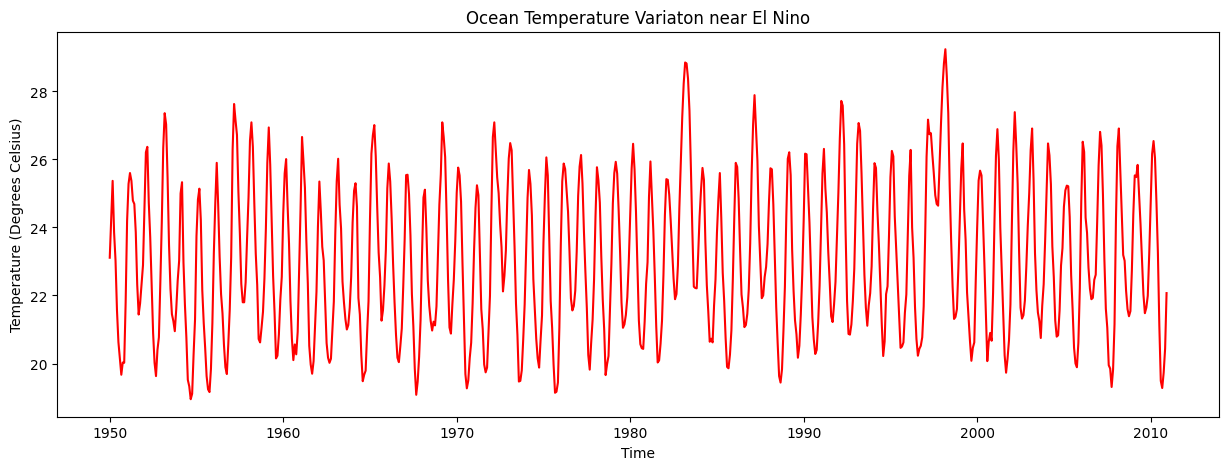

In [116]:
def visualize(df):
    """
    Visualize the El Niño – Sea Surface Temperature dataset.

    You decide the most appropriate way to visualize the dataset.

    Parameters
    ----------
    df : pd.DataFrame
        The Pandas dataframe of the El Niño – Sea Surface Temperature dataset
        from the statsmodels package.

    Returns
    -------
    None
    """
    date_num = []
    for i in range(len(x)):
      date_num.append(int(x[i].split('.')[0])+(i%12)/12)
    fig,ax = plt.subplots(figsize = (15,5))
    ax.plot(date_num,y,"r")
    plt.title("Ocean Temperature Variaton near El Nino")
    plt.ylabel("Temperature (Degrees Celsius)")
    plt.xlabel("Time")
    plt.show()
    return date_num

dt = visualize(df)

Figure 1: This shows the data for the Ocean Temp Variation near the area of El Nino, 1950-2010, monthly. We can see clear sinusoidal elements to the plot, but the height is changing year to year. There does not seem to be any sustained increase over time, however (global warming for example might give that for global average temperature, but I guess not for the ocean temp according to this data).

In [9]:
dt_final = []
for i in range(len(x)):
      dt_final.append(x[i].split('.')[0]+'.'+str((i)%12+1)) #put the dates into format Year.Month so I can create datetime objects easily later

In [11]:
dt_final[11].split('.')

['1950', '12']

In [12]:
dt_d = [0] #This will be "days since Jan 1, 1950", corresponding to each month in the dataset we opened before.
d1 = dt_final[0].split('.')
dt_1 = datetime.datetime(int(d1[0]),int(d1[1]),1) #Datetime obj for Jan 1, 1950
for i in range(len(dt)-1):
  d2 = dt_final[i+1].split('.')
  dt_2 = datetime.datetime(int(d2[0]),int(d2[1]),1) #create datetime obj for each month in the dataset
  delta = (dt_2 - dt_1).days #calculate days between Jan 1, 1950 and each month created above
  dt_d.append(delta)

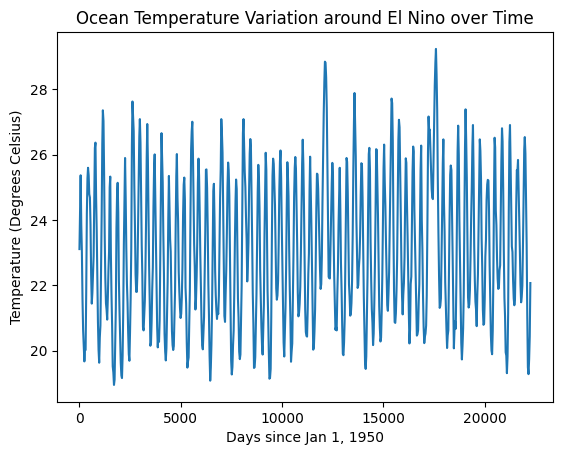

In [117]:
plt.plot(dt_d,y)
plt.title("Ocean Temperature Variation around El Nino over Time")
plt.xlabel("Days since Jan 1, 1950")
plt.ylabel("Temperature (Degrees Celsius)")
plt.show()

Figure 2: Similar to Figure 1, just changed the x axis to Days since Jan 1, 1950 to make sure that that array was working properly. We can see the same features as Fig. 1.

# 2. Gaussian Process Regression (GPR)

In [118]:
def get_interpolated_time():
    """
    We are going to use GPR to interpolate the sea surface temperatures for
    every day between January 1st 1950 and December 1st 2030. There are 29,555
    days between those two dates (inclusive). Create and return an array of
    times for each day in that timeframe.

    Paramters
    ---------
    None

    Returns
    -------
    interp_time : array-like
        A shape (29555,) array, the times we want to interpolate. Encoded the
        same way you did before or any way you like.
    """
    dates = np.linspace(0,29555,29556) #Since I'm doing days since Jan 1, 1950 for my previous array, it makes this array quite simple! There are 29555 days until Dec 1 2030, so just need a 29556 length array for integers between these two dates.
    return dates

t = get_interpolated_time()

In [134]:
def gaussian_process_regression(time, data, interp_time, initial_guess):
    """
    Using the george package, its documentation and startup guide, implement a
    gaussian process regressor on `time` and `data`. Then, use it to predict
    on `interp_time`.

    It will be helpful for you to write code to visualize the result of this
    initial model, but not necessary for the assignment.

    Parameters
    ----------
    time : array-like
        A shape (732,) array, times between 1950 and 2010, sampled every month.
    data : array-like
        A shape (732,) array, sea surface temperatures every month between 1950
        and 2010.
    interp_time : array-like
        A shape (29555,) array, times between 1950 and 2030, sampled every day.
    initial_guess : array-like or float
        The intial guess for the gaussian process that you make. The number of
        parameters will depend on the kernel you choose.

    Returns
    -------
    None
    """
    #data = data-np.mean(data)
    #kernel = np.var(data) * kernels.ExpSquaredKernel(initial_guess) #I was trying some other kernels here, ended up going with the un-commented one.
    #kernel = kernels.ExpSine2Kernel(1.0, np.log(initial_guess[0])) + np.var(data) * kernels.ConstantKernel(initial_guess[1])
    kernel = kernels.ExpSine2Kernel(1.0, np.log(initial_guess[0])) + np.var(data) * kernels.ExpSquaredKernel(initial_guess[1])

    gp = george.GP(kernel)
    gp.compute(time)
    pred, pred_var = gp.predict(data, interp_time, return_var=True)
    return pred, pred_var

initial_guess = [365,2000] #Had to mess around with this for a while. The 365 argument makes sense, as it is for the period of the sine wave kernel, and there is a yearly (365 day) frequency we expect in our data. The 2000 for the other kernel just is what looked good
pred, pred_var = gaussian_process_regression(dt_d, y, t, initial_guess)

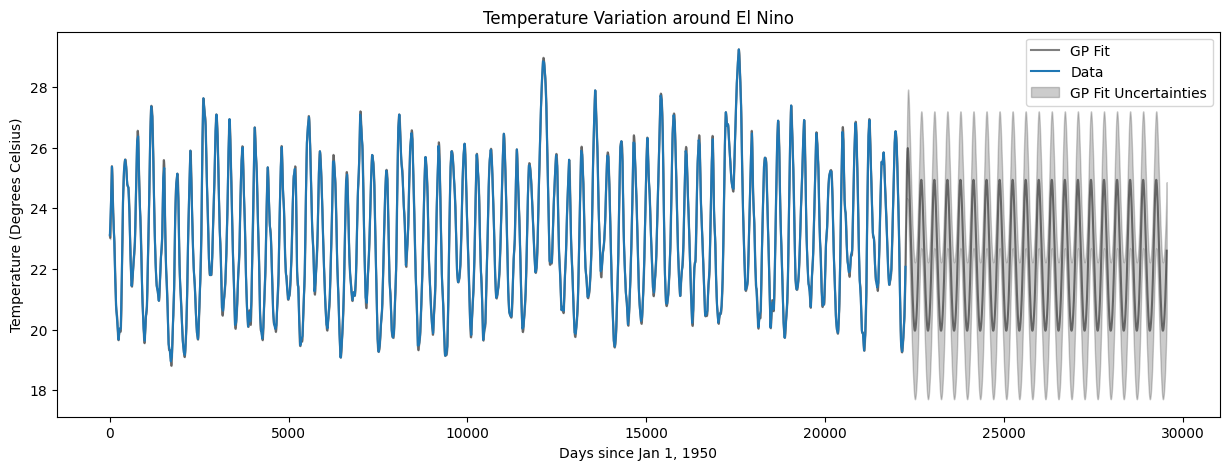

In [135]:
fig,ax = plt.subplots(figsize = (15,5))
ax.plot(t, pred, "k", lw=1.5, alpha=0.5,label="GP Fit")
ax.plot(dt_d,y,label="Data")
ax.fill_between(t, pred - np.sqrt(pred_var), pred + np.sqrt(pred_var),
                color="k", alpha=0.2,label="GP Fit Uncertainties")
#plt.xlim([25000,29000])
plt.title("Temperature Variation around El Nino")
plt.xlabel("Days since Jan 1, 1950")
plt.ylabel("Temperature (Degrees Celsius)")
plt.legend()
plt.show()

Figure 3: This shows the data for the monthly ocean temperature variation between 1950 and 2010, and then the daily GP fit between 1950 and 2030. We can see that the fit matches the data really well, but after there's no data it quickly goes to a constant sine wave (looks something like period of 365 days, as I entered as the initial guess), so I don't think that's a great predictor.

In [17]:
pred_var

array([1.24611432e-12, 7.62930061e-05, 2.73079068e-04, ...,
       5.10718041e+00, 5.10717900e+00, 5.10717802e+00])

# 3. Optimize

In [18]:
from scipy.optimize import minimize

In [122]:
initial_guess = [365,2000]
#initial_guess = 2000
kernel = kernels.ExpSine2Kernel(1.0, np.log(initial_guess[0])) + np.var(y) * kernels.ExpSquaredKernel(initial_guess[1])
#kernel = kernels.ExpSine2Kernel(1.0, np.log(initial_guess[0]))
#kernel = np.var(y) * kernels.ExpSquaredKernel(initial_guess)
gp = george.GP(kernel,white_noise=0.5)
gp.compute(dt_d)
pred, pred_var = gp.predict(y, t, return_var=True)
#using the same stuff as above.

In [123]:
def neg_ln_like(p): #this is all stolen from the george documentation example here: https://george.readthedocs.io/en/latest/tutorials/first/
    gp.set_parameter_vector(p)
    return -gp.log_likelihood(y)

In [124]:
def grad_neg_ln_like(p):
    gp.set_parameter_vector(p)
    return -gp.grad_log_likelihood(y)

In [125]:
result = minimize(neg_ln_like, gp.get_parameter_vector(), jac=grad_neg_ln_like) #do the minimization
print(result) #ok false but whatever let's assume this is ok

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 1130.5190803569803
        x: [ 1.828e+00  5.900e+00  6.197e+00  2.656e+01]
      nit: 43
      jac: [-4.964e-10 -8.516e-05  5.646e-09 -6.192e-09]
 hess_inv: [[ 3.790e-01  1.130e-06 -1.864e-02 -2.899e-02]
            [ 1.130e-06  4.568e-08 -2.688e-06 -4.399e-06]
            [-1.864e-02 -2.688e-06  2.010e+00  2.257e+00]
            [-2.899e-02 -4.399e-06  2.257e+00  5.176e+00]]
     nfev: 98
     njev: 86


In [126]:
gp.set_parameter_vector(result.x) #set the result from optimization as part of the gp object
print("\nFinal ln-likelihood: {0:.2f}".format(gp.log_likelihood(y)))

print


Final ln-likelihood: -1130.52


<function print>

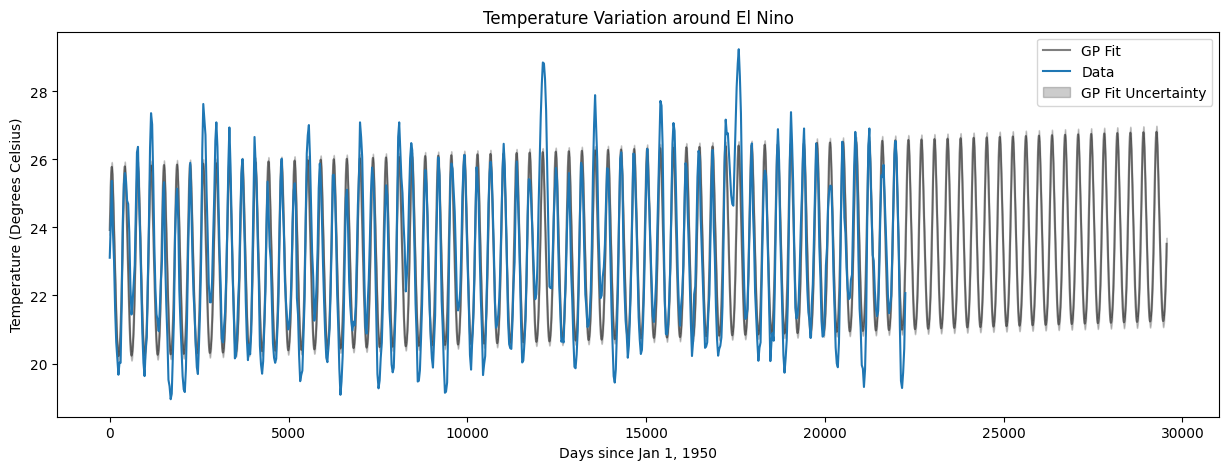

In [127]:
pred, pred_var = gp.predict(y, t, return_var=True) #retry the GP fit with these new parameters
fig,ax = plt.subplots(figsize = (15,5))
ax.plot(t, pred, "k", lw=1.5, alpha=0.5,label="GP Fit")
ax.plot(dt_d,y,label="Data")
ax.fill_between(t, pred - np.sqrt(pred_var), pred + np.sqrt(pred_var),
                color="k", alpha=0.2,label="GP Fit Uncertainty")
#plt.xlim([500,1000])
plt.title("Temperature Variation around El Nino")
plt.xlabel("Days since Jan 1, 1950")
plt.ylabel("Temperature (Degrees Celsius)")
plt.legend()
plt.show()

Figure 4: This shows the temp variation over time again, with the data and GP fit both plotted. In this figure, the GP fit is using the optimized parameters determined before. Interestingly, the optimized fit seems to fit the data worse than the previous fit, at least by eye. But, there's now a steadily increasing slope for like the center of the sine wave. The sine wave amplitude isn't increasing, but the middle point is, so the sine wave grows over time. However, the sine wave is now lacking the amplitude variation that matched the data so well in the pre-optimized version.

Maybe I discovered GLOBAL WARMING in my dataset?! But probably this is just not a great fit for whatever reason and the optimization isn't doing a good job.

Now I will try to minimize L2 function instead, and see if this is different.

In [96]:
def l2(args,x,y,t):
  kernel = kernels.ExpSine2Kernel(1.0, np.log(args[0])) + np.var(y) * kernels.ExpSquaredKernel(args[1]) #we will be optimizing these initial guess values, so we need to re-calculate the kernel each time
  gp = george.GP(kernel,white_noise = 1)
  gp.compute(x)
  pred, pred_var = gp.predict(y, t, return_var=True) #get the GP predictions
  sum = 0
  for i in range(len(x)):
    day = x[i]
    '''
    okay, so because the predictive t values (that go to 2030), are daily, we can't use all of these points, since there won't be a comparable datapoint for the true value (data). But because both are in terms of days since 1950,
    for each value in the x array (the original time array, so days since 1950 Jan 1 for each month until 2010), I get the number of days, and then use that as the index of my prediction t-value array, since the # of days since 1950
    for the monthly array is gonna be the same number of days I want to compare for the daily array to 2030.

    '''
    predval = pred[day] #this is the corresponding y-value from the GP prediction for the same DAY as the month-based array. So now I can do the comparison between the data and the GP model at the same point each time (which is pretty necessary!)
    real = y[i]
    dist = (np.absolute(real-predval))**2  #L2 calculation
    sum = sum+dist
  return sum

In [97]:
initialGuess = [365,1950]
l2Solution = minimize(l2, initialGuess, args=(dt_d, y, t)) #THIS WILL TAKE A REALLY LONG TIME!!!!!!!!!!!!!!!! (~10 mins) YOU HAVE BEEN WARNED

In [128]:
print(l2Solution) #great success!

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 50.59233152043397
        x: [ 3.652e+02  1.674e+03]
      nit: 21
      jac: [-3.338e-06 -3.815e-06]
 hess_inv: [[ 5.312e-02  9.316e-02]
            [ 9.316e-02  1.677e-01]]
     nfev: 183
     njev: 61


In [130]:
initial_guess = [3.652e2,1.674e3] #rerun the GP fit with the optimized initial guess params
kernel = kernels.ExpSine2Kernel(1.0, np.log(initial_guess[0])) + np.var(y) * kernels.ExpSquaredKernel(initial_guess[1])
gp = george.GP(kernel)
gp.compute(dt_d)
pred, pred_var = gp.predict(y, t, return_var=True)


# 4. Visualize your model

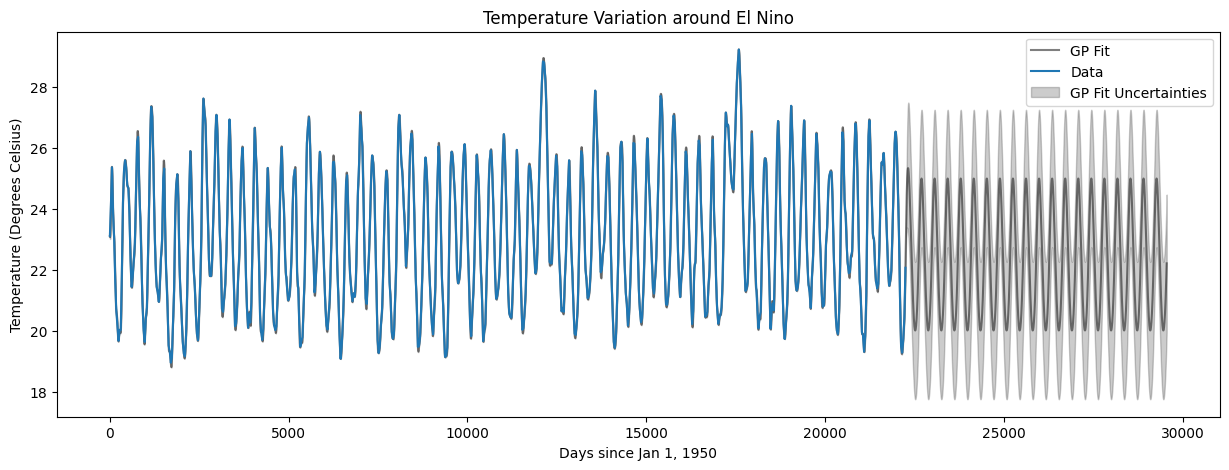

In [131]:
fig,ax = plt.subplots(figsize = (15,5))
ax.plot(t, pred, "k", lw=1.5, alpha=0.5,label="GP Fit")
ax.plot(dt_d,y,label="Data")
ax.fill_between(t, pred - np.sqrt(pred_var), pred + np.sqrt(pred_var),
                color="k", alpha=0.2,label="GP Fit Uncertainties")
#plt.xlim([25000,29000])
plt.legend()
plt.title("Temperature Variation around El Nino")
plt.xlabel("Days since Jan 1, 1950")
plt.ylabel("Temperature (Degrees Celsius)")
plt.legend()
plt.show()

Figure 5: This plot shows the result of the GP optimization. It fits the data very well, but has limited ability to predict future temperatures because it's just predicting a sine wave. Yes, the data is periodic, but there's clearly more variation in pre-2010 (the data in blue) than post-2010 (grey). However, I was optimizing to fit to the DATA as best as possible, so maybe it makes sense that the quality of the post-data fit is sort of neglected within the optimization, so it can kinda be whatever and it wouldn't affect the optimization value. Not sure if there's a way to fix that within an optimizer, since there's no data to compare with after 2010, so you can't find, for example, the difference between data and model prediction to control the optimizer where there is no data.